# Analyse Score distribution along social dimensions

To create an hypothesis of social disparities in the dataset we need to descriptivly analyse the score distributions along the identified social dimensions.  
Our hypothesis so far is, according to differences in income, that the following dimensions are most likely differently distributed w.r.t. score:
- age
- sex
- east_west

As an descriptive approximation we first use the rating-levels of the SCHUFA as an interpretation of the actual score. After looking at the ratings, we do some statistical tests with the most interessting social groups using the continuous score variable.

In the end we want to decide a branche-score we want to use for our further analysis as well as the social groups that seem most interessting, so we can formulate our hypothesis.

To do so, we Analyse the distribution of score-ratings on the following levels:
1. The whole dataset
2. On dataset with scores over a specified cut-off
3. On a more homogenous subsample, consisting of selected social groups.

We do that process for all scores we want to analyse and decide for the most interesting scores and version according to their results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import analysis_helpers as hstats

In [12]:
def group_stacked(feat, df, domain, score_feat):
    print("The proportion plots are arranged from domains highest version to lowest")
    #feat = "generation_groups"
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
    
    score_3 = df[np.all([
            df["domain"]==domain, 
            df["version"]==3], axis=0)]
    score_2 = df[np.all([
            df["domain"]==domain, 
            df["version"]==2], axis=0)]
    score_1 = df[np.all([
            df["domain"]==domain, 
            df["version"]==1], axis=0)]

    # For version 3
    score_count = score_3.groupby([score_feat, feat])[score_feat].count()

    for idx in score_count.index.levels[1]:
        score_count.loc[:, idx] = score_count.loc[slice(None),slice(idx), :] / score_count.loc[slice(None),slice(idx), :].sum()

    score_count.unstack(score_feat).fillna(0).plot(kind="bar", stacked=True, ax=axes[0])
    axes[0].set_title("score-version 3")
    axes[0].set_ylabel("rel. frequency")

    # For version 2
    score_count = score_2.groupby([score_feat, feat])[score_feat].count()

    for idx in score_count.index.levels[1]:
        score_count.loc[:, idx] = score_count.loc[slice(None),slice(idx), :] / score_count.loc[slice(None),slice(idx), :].sum()

    score_count.unstack(score_feat).fillna(0).plot(kind="bar", stacked=True, ax=axes[1])
    axes[1].set_title("score-version 2")
    axes[1].set_ylabel("rel. frequency")

    # For version 1
    score_count = score_1.groupby([score_feat, feat])[score_feat].count()

    for idx in score_count.index.levels[1]:
        score_count.loc[:, idx] = score_count.loc[slice(None),slice(idx), :] / score_count.loc[slice(None),slice(idx), :].sum()

    score_count.unstack(score_feat).fillna(0).plot(kind="bar", stacked=True, ax=axes[2])
    axes[2].set_title("score-version 1")
    axes[2].set_ylabel("rel. frequency")
    
    fig.suptitle("Relative proportion of rating-levels per score-version")

In [13]:
# Scores for nominal analysis
def get_scores(domain, version, feat, df):
    bool_mask = np.all([df["domain"]==domain, df["version"]==version], axis=0)
    return df[bool_mask][feat]

In [14]:
def get_boolean_mask(df, domain, version):
    return np.all([df["domain"]==domain, df["version"]==version], axis=0)

## Specify paths, load data and define functions for plotting

In [15]:
data_path = "/media/veracrypt1/SPON_dataset_tables/"
plot_path = "plots/"

In [16]:
table2 = pd.read_csv(data_path + "datasets_v2/20190703_analysis_dataset_versandbank_final.csv", sep=";")

In [17]:
domain = "Banken"

In [18]:
banken = table2[table2["domain"]==domain]

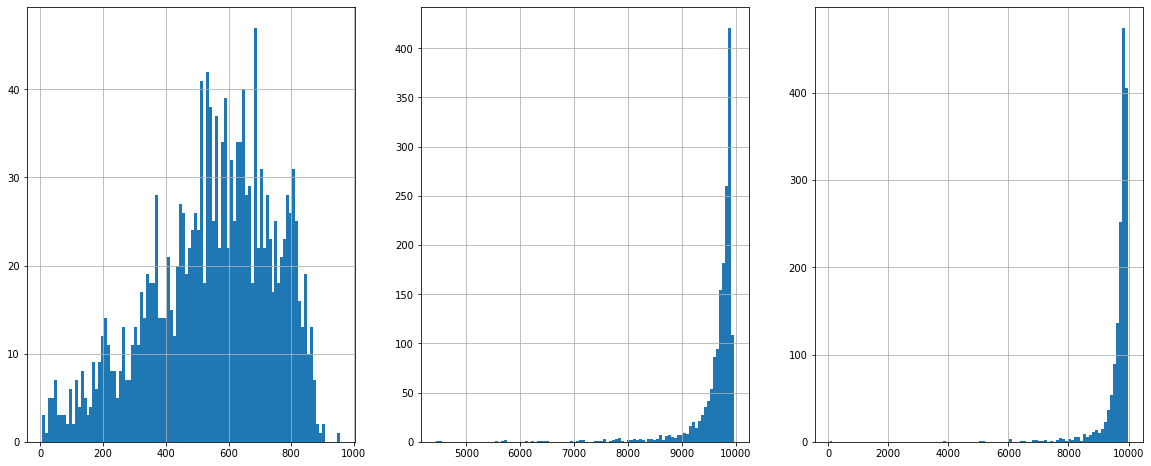

In [19]:
# Distribution of scores
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))

for i in range(3):
    banken[banken.version==i+1]["score"].hist(bins=100, ax=axes[i])

In [20]:
banken.loc[banken.version==2, "score"] = banken.loc[banken.version==2, "score"].apply(lambda x: 1000-np.log(10000-x)*100)
banken.loc[banken.version==3, "score"] = banken.loc[banken.version==3, "score"].apply(lambda x: 1000-np.log(10000-x)*100)

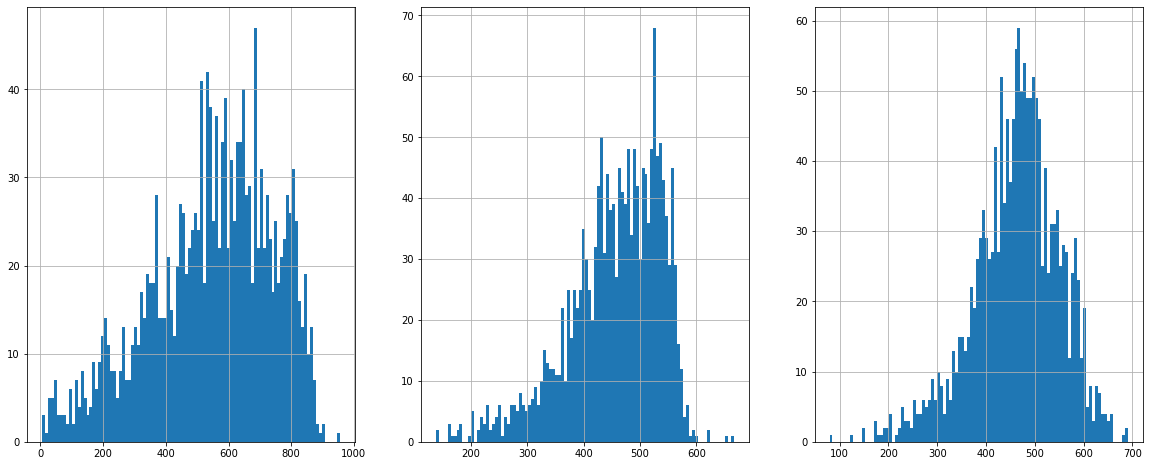

In [21]:
# Distribution of scores
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))

for i in range(3):
    banken[banken.version==i+1]["score"].hist(bins=100, ax=axes[i])

In [22]:
# Devide different types of features
metric_feats = ['numberOfActiveLoans', 'numberOfChildren','numberOfCreditCards', 'numberOfGiroAccounts', 'numberOfMobileContracts', 'numberOfPaidOffLoans', 'relocation', 'yearOfBirth']
ordinal_feats = ['activeLoanAmount', 'monthlyIncome', 'paidOffLoanAmount', 'age_groups', 'generation_groups']
nominal_feats = ['employment', 'familyStatus', 'housing', 'sex', 'east_west']

Text(0, 0.5, 'Score')

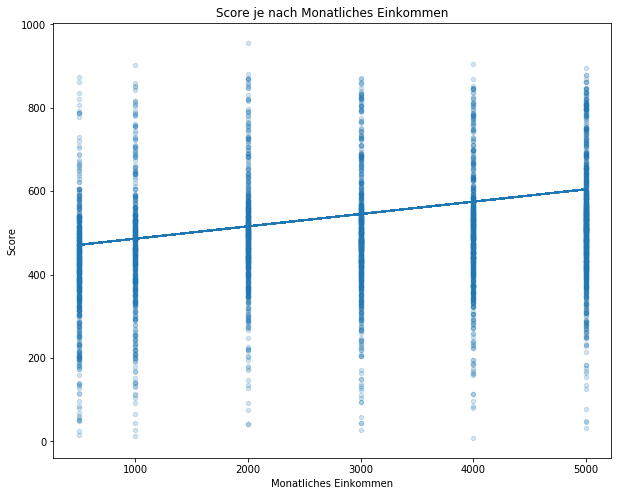

In [23]:
df_temp = pd.DataFrame([banken[banken.version==1].monthlyIncome, banken[banken.version==1].score]).T.dropna()

b, m = np.polynomial.polynomial.polyfit(df_temp.monthlyIncome.dropna().values, df_temp.score.dropna().values, 1)

ax = banken.plot(kind="scatter", x="monthlyIncome", y="score", figsize=(10, 8), alpha=.2)
ax.plot(banken.monthlyIncome.values, b + m * banken.monthlyIncome.values, '-')

ax.set_title("Score per monthly income interval")
ax.grid(False)
ax.set_xlabel("monthly income")
ax.set_ylabel("score")

Text(0, 0.5, 'Score')

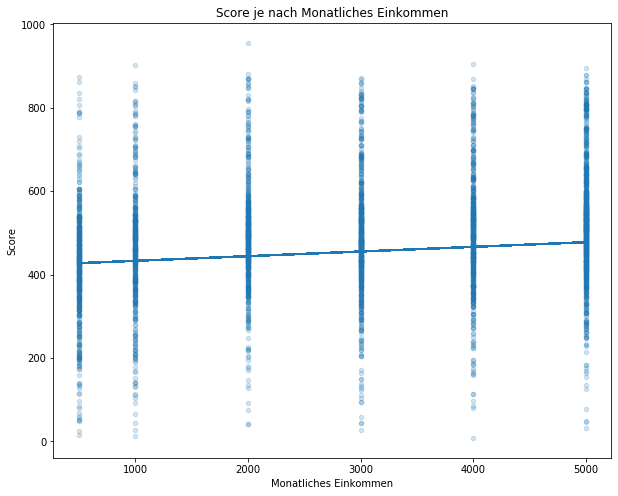

In [24]:
df_temp = pd.DataFrame([banken[banken.version==2].monthlyIncome, banken[banken.version==2].score]).T.dropna()

b, m = np.polynomial.polynomial.polyfit(df_temp.monthlyIncome.dropna().values, df_temp.score.dropna().values, 1)

ax = banken.plot(kind="scatter", x="monthlyIncome", y="score", figsize=(10, 8), alpha=.2)
ax.plot(banken.monthlyIncome.values, b + m * banken.monthlyIncome.values, '-')

ax.set_title("Score per monthly income interval")
ax.grid(False)
ax.set_xlabel("monthly income")
ax.set_ylabel("score")

Text(0, 0.5, 'Score')

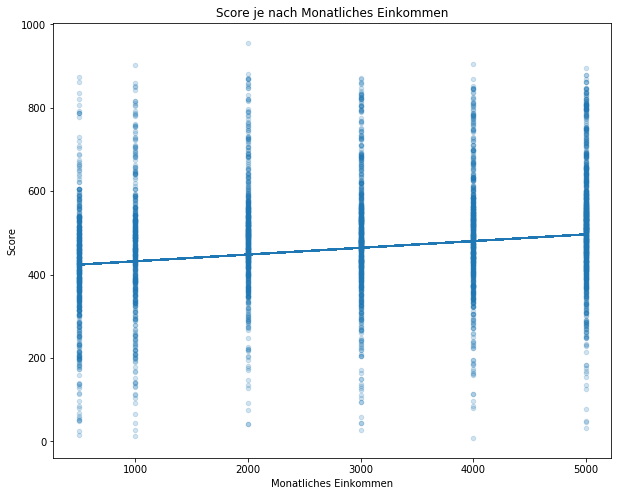

In [25]:
df_temp = pd.DataFrame([banken[banken.version==3].monthlyIncome, banken[banken.version==3].score]).T.dropna()

b, m = np.polynomial.polynomial.polyfit(df_temp.monthlyIncome.dropna().values, df_temp.score.dropna().values, 1)

ax = banken.plot(kind="scatter", x="monthlyIncome", y="score", figsize=(10, 8), alpha=.2)
ax.plot(banken.monthlyIncome.values, b + m * banken.monthlyIncome.values, '-')

ax.set_title("Score per monthly income interval")
ax.grid(False)
ax.set_xlabel("monthly income")
ax.set_ylabel("score")

In [26]:
import seaborn as sns

In [76]:
def mbox_score_plot(df, col1, name, chars, attr=None):
    score_l = ["Score", "log max scaled Score", "log max scaled Score"]
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22,8))
    for v in range(3):
        ax = sns.boxplot(x=col1, y="score", data=df[df.version==v+1], color="skyblue", order=chars, ax=axes[v])
        ax.set_title("score per %s"%name)
        ax.grid(False)
        ax.set_xlabel(name)
        ax.set_ylabel("%s version %s"%(score_l[v], v+1))
        if attr is not None:
            ax.set_xticklabels(attr)    
        
        plt.suptitle("")
        
def scatter_score_plot(df, col1, name):
    score_l = ["Score", "log max scaled Score", "log max scaled Score"]
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22,8))
    for v in range(3):
        ax = df[df.version==v+1].plot(kind="scatter", x=col1, y="score", ax=axes[v])
        ax.set_title("Score per %s"%name)
        ax.grid(False)
        ax.set_xlabel(name)
        ax.set_ylabel("%s Version %s"%(score_l[v], v+1))

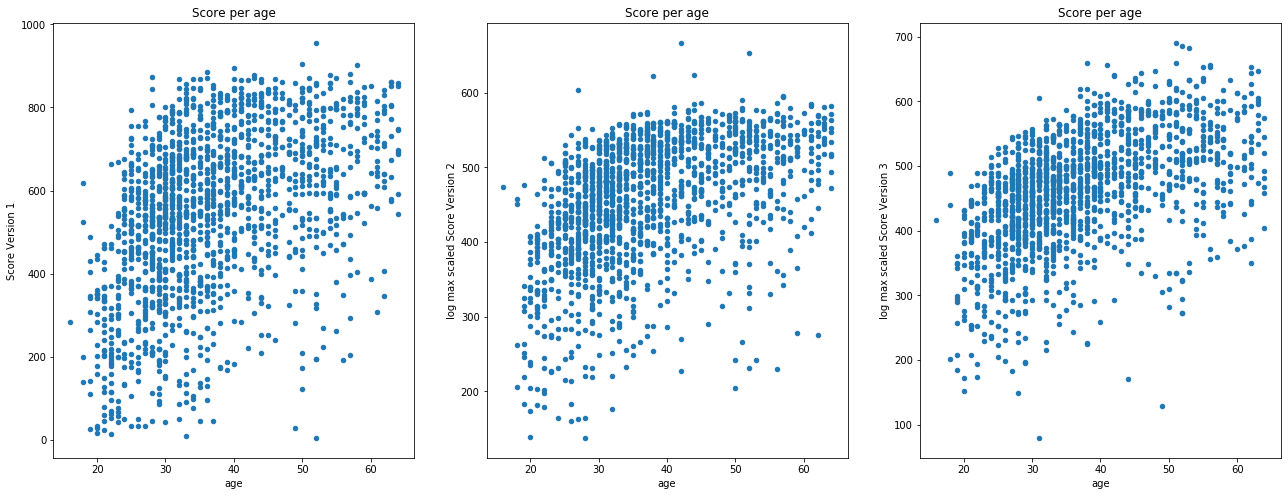

In [42]:
scatter_score_plot(banken, "age", "age")

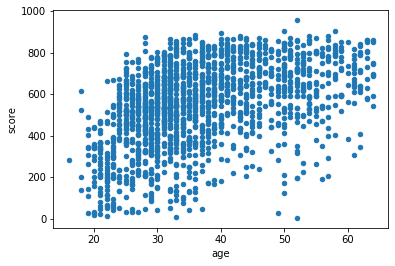

In [67]:
banken[banken.version==1].plot(kind="scatter", x="age", y="score")

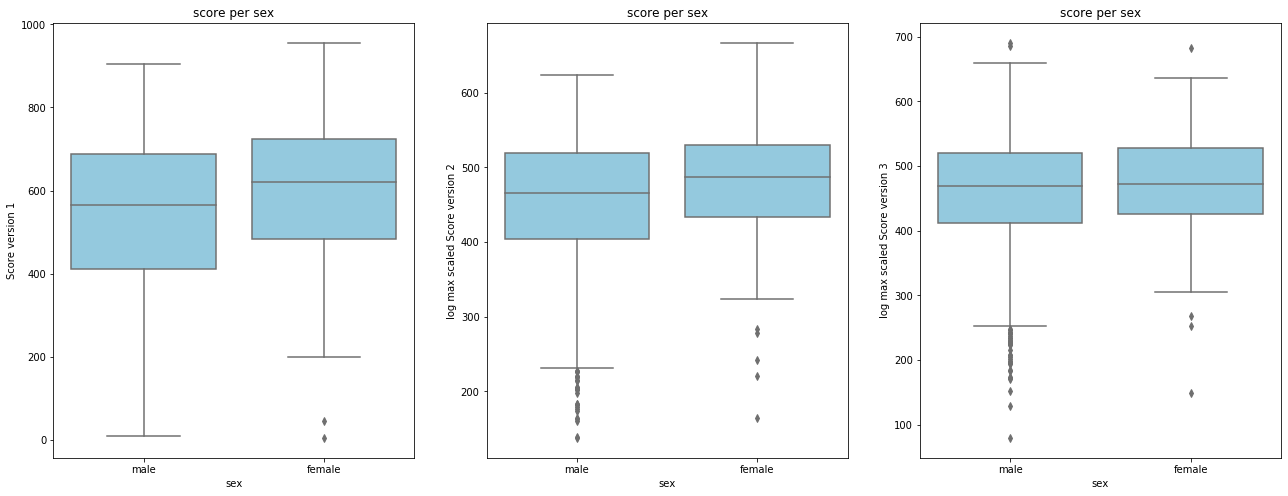

In [77]:
mbox_score_plot(banken, "sex", "sex", ["male", "female"])

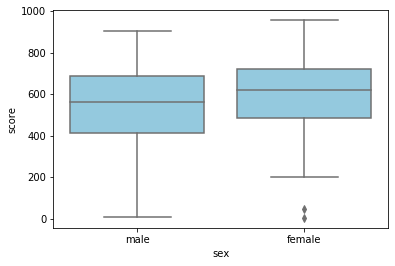

In [49]:
sns.boxplot(x="sex", y="score", data=banken[banken.version==1], color="skyblue", order= ["male", "female"])
plt.show()

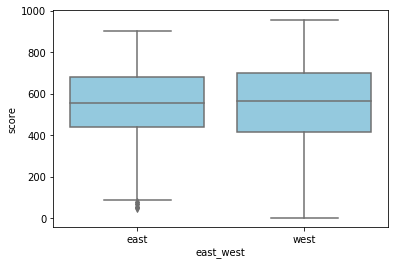

In [63]:
sns.boxplot(x="east_west", y="score", data=banken[banken.version==1], color="skyblue", order= ["east", "west"])
plt.show()

The proportion plots are arranged from domains highest version to lowest


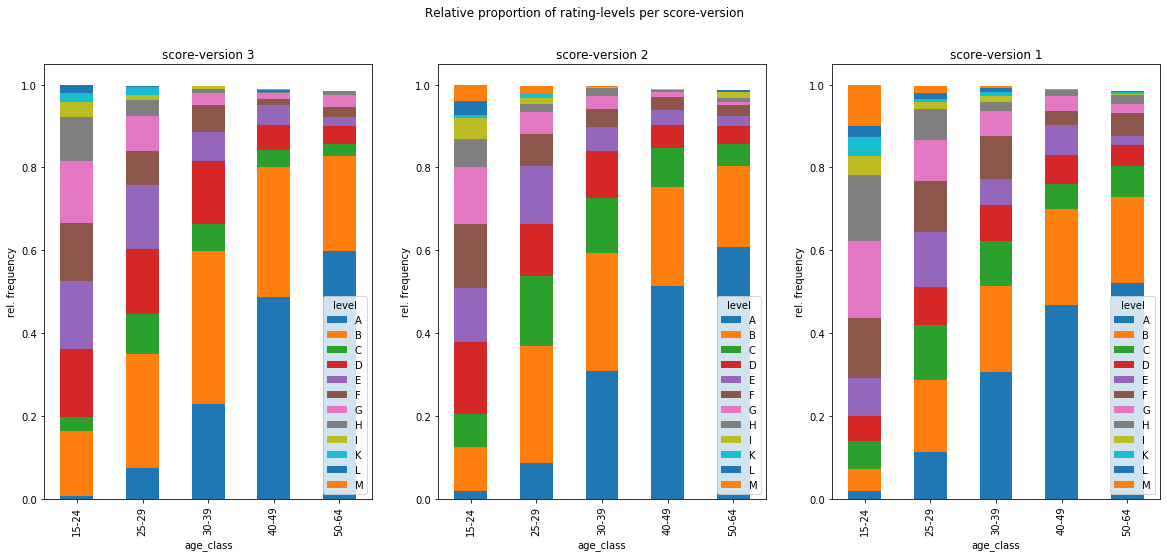

In [50]:
group_stacked("age_class", banken, domain, "level")

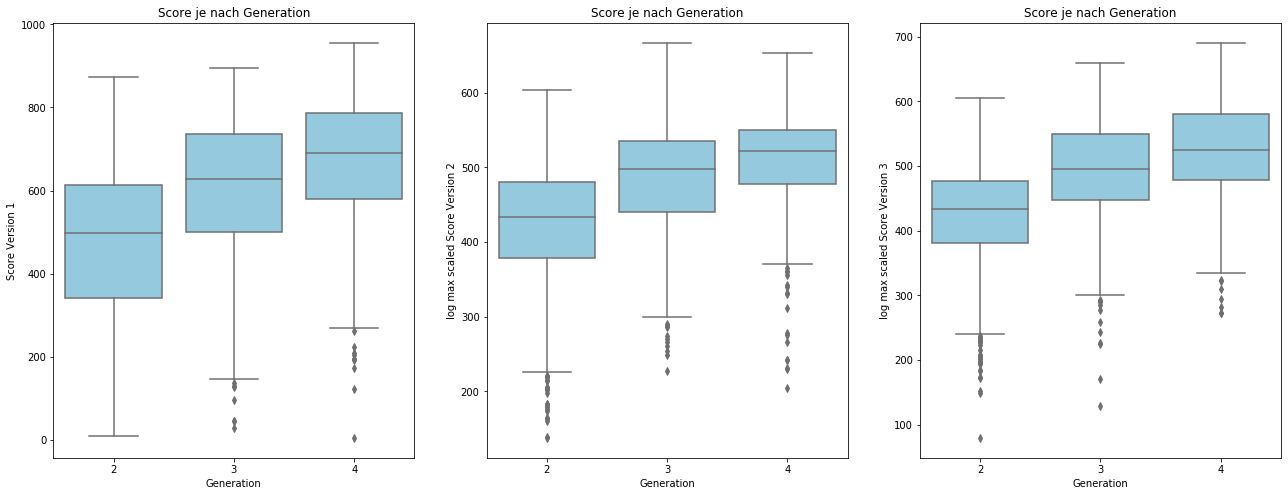

In [51]:
mbox_score_plot(banken, "age_gen", "Generation", [2, 3, 4])

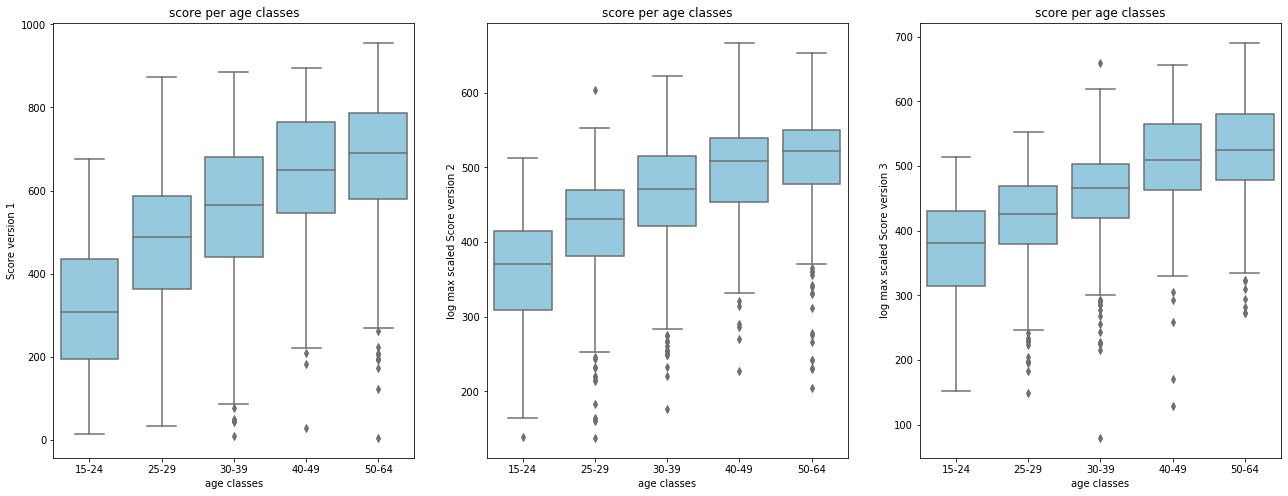

In [78]:
mbox_score_plot(banken, "age_class", "age classes", ['15-24', '25-29', '30-39', '40-49', '50-64'])

Text(0, 0.5, 'bank score Version 1')

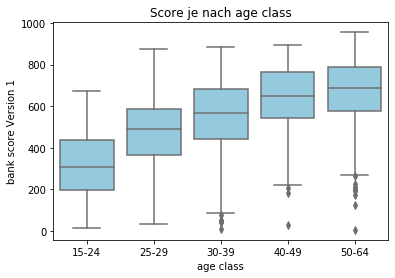

In [74]:
ax = sns.boxplot(x="age_class", y="score", data=banken[banken.version==1], color="skyblue", order=['15-24', '25-29', '30-39', '40-49', '50-64'])
ax.set_title("Score je nach age class")
ax.grid(False)
ax.set_xlabel("age class")
ax.set_ylabel("bank score Version 1")

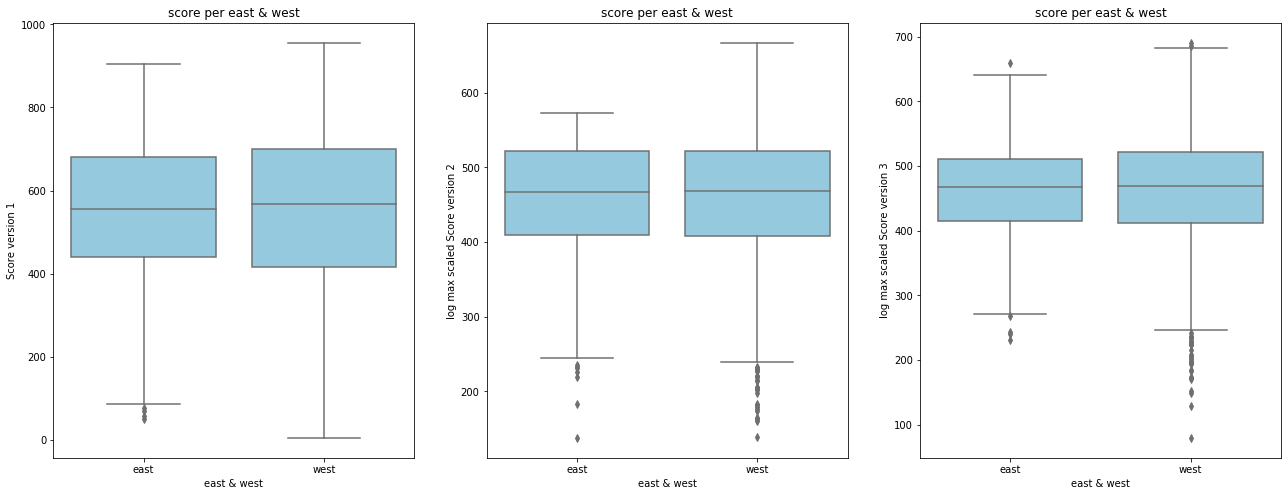

In [79]:
mbox_score_plot(banken, "east_west", "east & west", ["east", "west"])

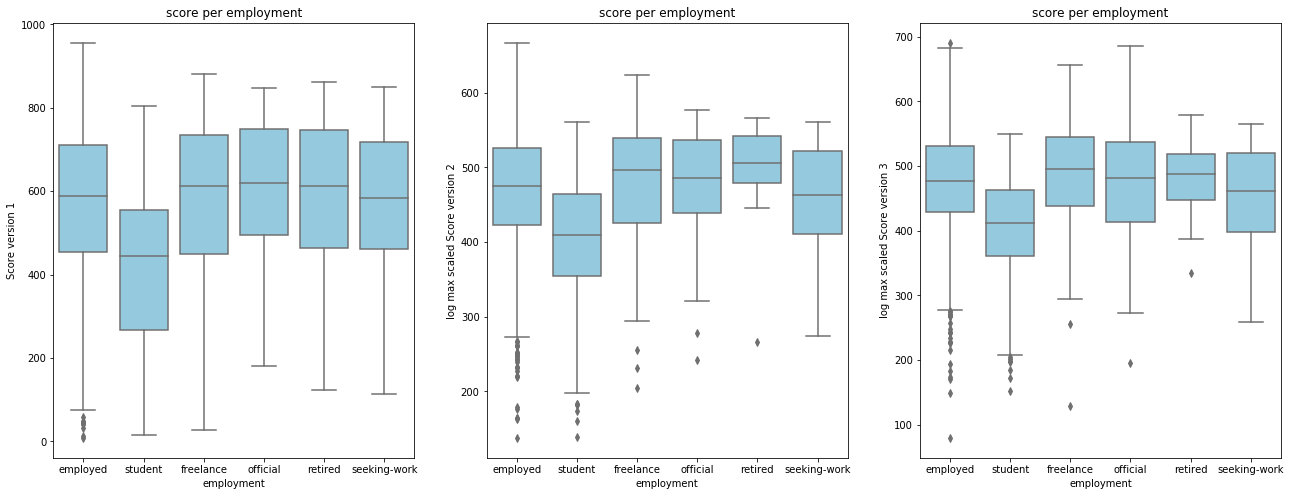

In [80]:
mbox_score_plot(banken, "employment", "employment", ["employed", "student", "freelance", "official", "retired", "seeking-work"])

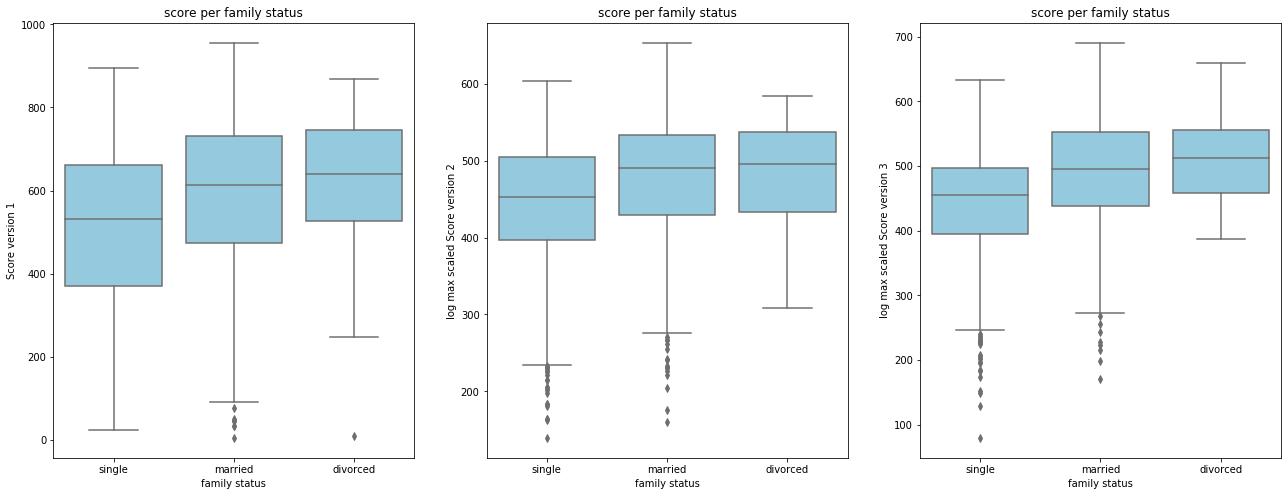

In [81]:
mbox_score_plot(banken, "familyStatus", "family status", ["single", "married", "divorced"])

In [56]:
banken[["score", "domain", "version", "age", "relocation", "numberOfChildren"]].groupby(["domain", "version"]).corr(method="pearson")["score"].unstack().T

domain              Banken                    
version                1.0       2.0       3.0
score             1.000000  1.000000  1.000000
age               0.449658  0.462429  0.505275
relocation       -0.229114 -0.258409 -0.264534
numberOfChildren  0.153342  0.187204  0.242777

In [57]:
banken[["score", "domain", "version", "monthlyIncome"]].groupby(["domain", "version"]).corr(method="spearman")["score"].unstack().T

domain           Banken                    
version             1.0       2.0       3.0
score          1.000000  1.000000  1.000000
monthlyIncome  0.245206  0.219566  0.312808

In [58]:
# anova
print("Yellow means rejecting the null-hypothesis according to a p-value < 0.05")

anova_stats = hstats.get_anova_stats(banken[get_boolean_mask(banken, domain, 1)][nominal_feats], 
                                     get_scores(domain, 1, "score", banken), "score")

anova_stats.style.apply(hstats.highlight_significance_anova)

Yellow means rejecting the null-hypothesis according to a p-value < 0.05


,F-test,H-test,df1,df2,Normal-test,Variance-test
employment,"(30.448079455114023, 1.4476037601280688e-29)","(130.84154504147392, 1.5775237612336388e-26)",5,1498,"[(0.9670571088790894, 7.49711707645484e-14), (0.9620499610900879, 0.00016145127301570028), (0.9292701482772827, 0.0004705055325757712), (0.9499049782752991, 0.4881827235221863), (0.9596045017242432, 0.28480446338653564), (0.977461040019989, 0.0003411757934372872)]","(0.4974634179314714, 0.7783400637739668)"
familyStatus,"(18.518810826002586, 8.701503691756483e-12)","(57.31370479872741, 2.202646981957774e-12)",3,1422,"[(0.929381787776947, 0.0047141616232693195), (0.9589419960975647, 4.210512147273526e-12), (0.9808632731437683, 2.5064684550102356e-08), (0.9349824786186218, 0.5301822423934937)]","(1.316159528899916, 0.26753167685307)"
housing,"(42.23138740683747, 1.4979599153893914e-18)","(77.34028025449875, 1.6060961029037625e-17)",2,1444,"[(0.9716899991035461, 5.054978571145119e-12), (0.9586296081542969, 2.870100379581686e-09), (0.973563551902771, 0.003130156546831131)]","(5.260134808700186, 0.005294609772455814)"
sex,"(9.272566256989396, 0.002363614646786682)","(8.289403020609853, 0.003987709605591621)",1,1620,"[(0.9698827862739563, 0.001797830918803811), (0.9703128337860107, 8.283414447374601e-17)]","(4.329484935141884, 0.03761436804084501)"
east_west,"(0.15747735373853539, 0.6915422850237041)","(0.2708044162762956, 0.6027926728905211)",1,1612,"[(0.9617984890937805, 7.689948233746691e-08), (0.9699572920799255, 1.4223456659633016e-15)]","(2.2670670572868143, 0.1323456983429483)"


In [59]:
# anova
print("Yellow means rejecting the null-hypothesis according to a p-value < 0.05")

anova_stats = hstats.get_anova_stats(banken[get_boolean_mask(banken, domain, 2)][nominal_feats], 
                                     get_scores(domain, 2, "score", banken), "score")

anova_stats.style.apply(hstats.highlight_significance_anova)

Yellow means rejecting the null-hypothesis according to a p-value < 0.05


,F-test,H-test,df1,df2,Normal-test,Variance-test
employment,"(28.357477973458675, 1.5319562357618897e-27)","(130.95486755600197, 1.492532033994156e-26)",5,1499,"[(0.9398514032363892, 2.3583942899894853e-19), (0.9335418939590454, 3.43775269584512e-07), (0.9229245185852051, 0.00035499341902323067), (0.7818318009376526, 0.0015784213319420815), (0.9310904741287231, 0.0420035757124424), (0.9575384259223938, 1.2793572068403591e-06)]","(1.1254994151772395, 0.344691988350144)"
familyStatus,"(21.283615182276442, 1.7262439148106666e-13)","(68.65205830267996, 8.295738677227503e-15)",3,1432,"[(0.9433845281600952, 0.018376989290118217), (0.93137526512146, 3.087941194927909e-16), (0.9496087431907654, 2.0743906758475964e-15), (0.7992056608200073, 0.019998963922262192)]","(1.1354851463513482, 0.3334820932164562)"
housing,"(57.747045083474696, 7.415410518113501e-25)","(116.86095859168891, 4.206929816855028e-26)",2,1449,"[(0.9356483221054077, 5.076806016895605e-19), (0.9387461543083191, 6.1494156121388865e-12), (0.9724186062812805, 0.002324551111087203)]","(2.7998460370338742, 0.06114850275885797)"
sex,"(14.023119831156729, 0.00018686247213063956)","(12.698122690382638, 0.0003660228530030803)",1,1628,"[(0.9404727816581726, 2.7863184186571743e-06), (0.9469134211540222, 1.3718607948332932e-22)]","(4.731666574830948, 0.02975566353370014)"
east_west,"(0.13629768899311842, 0.712037837562958)","(0.05974543622626593, 0.8068987421553854)",1,1624,"[(0.9317858815193176, 2.202056592626178e-11), (0.9484821557998657, 8.550974735505522e-21)]","(0.01797871594589934, 0.8933521849720524)"


In [40]:
# anova
print("Yellow means rejecting the null-hypothesis according to a p-value < 0.05")

anova_stats = hstats.get_anova_stats(banken[get_boolean_mask(banken, domain, 3)][nominal_feats], 
                                     get_scores(domain, 3, "score", banken), "score")

anova_stats.style.apply(hstats.highlight_significance_anova)

Yellow means rejecting the null-hypothesis according to a p-value < 0.05


,F-test,H-test,df1,df2,Normal-test,Variance-test
employment,"(33.143184820058785, 4.2676321851102524e-32)","(151.83698657298103, 5.4256859633317056e-31)",5,1441,"[(0.9800693988800049, 7.935314072504696e-10), (0.9655247926712036, 0.0003040024603251368), (0.9800170660018921, 0.28280195593833923), (0.9592715501785278, 0.7110767960548401), (0.9661678075790405, 0.46102216839790344), (0.957707405090332, 1.2227096704009455e-06)]","(1.1273735248835428, 0.34371802255749145)"
familyStatus,"(38.52776176878057, 6.676729365725499e-24)","(108.56387405726983, 2.2355454759755076e-23)",3,1369,"[(0.978797972202301, 0.5435357093811035), (0.9821006059646606, 1.103103954847029e-06), (0.968336820602417, 2.288344166934131e-11), (0.9229022860527039, 0.38179856538772583)]","(0.7343128121887359, 0.5315601560758103)"
housing,"(102.58943664841476, 2.848450123546047e-42)","(179.51668916875613, 1.0433889721378508e-39)",2,1384,"[(0.970471978187561, 5.93427650769085e-12), (0.9881218075752258, 0.002538080560043454), (0.9811218976974487, 0.031158318743109703)]","(0.5716249897684278, 0.5647404550572932)"
sex,"(2.180651009663087, 0.13995677654839067)","(1.2277331266688765, 0.2678483443217352)",1,1563,"[(0.9794442653656006, 0.01636621542274952), (0.9818814992904663, 2.809542962861622e-12)]","(4.169816036350812, 0.04131782012104451)"
east_west,"(0.04278157671307239, 0.8361642480462466)","(0.3193899570019525, 0.5719744892608037)",1,1551,"[(0.9894578456878662, 0.02397899329662323), (0.9780871868133545, 8.716857530927102e-13)]","(1.64683023128622, 0.199582611084208)"
